<a href="https://colab.research.google.com/github/Lunalykaya/cs_homework/blob/main/academicwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
pip install pmdarima

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

#from pmdarima import auto_arima

In [78]:
df = pd.read_excel('vvp.xlsx')

In [79]:
df.head()

,Период,Валовой внутренний продукт (ВВП),Unnamed: 2
0,1995/I квартал,0,(л)
1,1995/II квартал,0,(л)
2,1995/III квартал,0,(л)
3,1995/IV квартал,0,(л)
4,1996/I квартал,3.3,(р)


In [80]:
df.columns = ['time', 'GDP Growth (%)', 'tags']

Список тегов:
б	Разрыв временного ряда	с	Конфиденциальная информация	г	Разница в определении
да	Оценочная стоимость	ф	Прогнозируемое значение	и	Вмененная стоимость
и	Отсутствует значение — данные существуют, но не были собраны.	-	Отсутствует значение — данные не могут существовать	н	Не имеет значения
…	Данные отсутствуют.	п	Предыдущие данные	в	Низкая надежность
г	Пересмотренные данные	*	Исправленная информация

In [81]:
df["GDP Growth (%)"] = df["GDP Growth (%)"].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
df["GDP Growth (%)"] = pd.to_numeric(df["GDP Growth (%)"], errors='coerce')

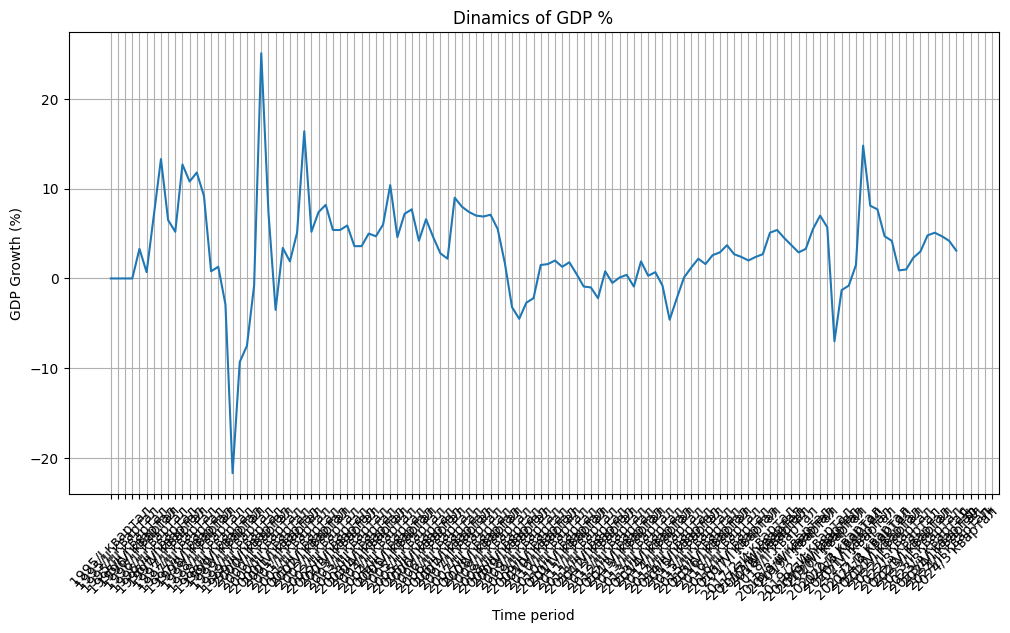

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['time'], y=df["GDP Growth (%)"])
plt.xlabel("Time period")
plt.ylabel("GDP Growth (%)")
plt.title("Dinamics of GDP %")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [83]:
fig = px.line(df, x='time', y='GDP Growth (%)', title="Dynamics of GDP %")
fig.update_layout(
    xaxis_title="Time period",
    yaxis_title="GDP Growth (%)",
    xaxis=dict(tickangle=45),
    template="plotly_white"
)

fig.show()

График представляет собой временной ряд, отображающий динамику роста ВВП (%) по кварталам. Вот что можно заметить:  

1. **Ось X**:  
   - Подписи на оси X представляют квартальные периоды, например, "1995 1 квартал", "1996 2 квартал" и так далее.  
   - Подписи выглядят перегруженными и наклонены под углом, что затрудняет их чтение. Возможно, стоит укоротить подписи (например, "1995-Q1" вместо "1995 1 квартал").  
   
2. **Ось Y**:  
   - Отображает процентное изменение ВВП, с заметными скачками вверх и вниз.  
   - Видно, что в определённые моменты рост ВВП резко падал (например, в конце 90-х годов) и затем восстанавливался.  

3. **Общий тренд**:  
   - В конце 90-х был резкий спад ВВП, после которого последовал быстрый рост.  
   - После 2000-х изменения становятся более сглаженными, но периодически появляются волатильные скачки.  
   - Видны кризисные моменты (например, 2008-2009 и 2020 годы), когда ВВП резко падал.  

4. **Что можно улучшить**:  
   - Укоротить подписи оси X.  
   - Добавить маркеры на линии для лучшей визуализации точек.  
   - Добавить вертикальные линии или аннотации для обозначения кризисных периодов.  

Если есть конкретный вопрос или хочешь что-то подправить в визуализации — давай разберём! 😊

### **Анализ временного ряда: Динамика роста ВВП (%)**  

#### **1. Общая структура графика**  
График представляет временной ряд, где:  
- **Ось X** – отображает кварталы с 1995 года по настоящее время, но названия подписей длинные и наклонены, что затрудняет чтение.  
- **Ось Y** – процентное изменение ВВП, с положительными и отрицательными значениями.  

График демонстрирует цикличность и волатильность ВВП, с резкими падениями и периодами устойчивого роста.  

---

#### **2. Основные тренды и аномалии**  
**Ранний период (1995-2000)**  
- Виден значительный рост ВВП в середине 90-х, но затем в конце десятилетия происходит **резкий обвал**.  
- Самый глубокий спад наблюдается около 1998-1999 годов. Это может быть связано с финансовым кризисом 1998 года, когда экономика многих стран переживала сильные потрясения.  

**2000-2008 – Рост с колебаниями**  
- В начале 2000-х годов экономика демонстрирует восстановление и рост, но с **высокой волатильностью**.  
- В период 2005-2008 рост ВВП кажется относительно стабильным, без резких скачков.  

**2008-2009 – Глобальный финансовый кризис**  
- Наблюдается **резкое падение ВВП** в 2008-2009 годах, соответствующее мировому экономическому кризису.  
- После этого следует **быстрое восстановление**, но оно не достигает предкризисного уровня.  

**2010-2019 – Умеренная стабильность с флуктуациями**  
- В этот период наблюдаются **относительно стабильные колебания**, но с эпизодическими падениями.  
- В целом, тренд показывает умеренный рост, но не такой резкий, как в 2000-х.  

**2020 – Пандемия COVID-19**  
- Виден **резкий спад ВВП** в 2020 году, что связано с глобальной пандемией COVID-19.  
- Однако после этого следует **быстрое восстановление**.  

**2021-2024 – Волатильность**  
- В последние годы колебания остаются, но не такие экстремальные, как в кризисные периоды.  
- ВВП после 2022 года имеет тенденцию к росту, но с незначительными колебаниями.  

---

#### **3. Необычные и интересные моменты**  
- **Крайне резкие скачки**: В конце 90-х и 2008-2009 годах спады были экстремально глубокими, а затем быстрое восстановление.  
- **Сильный рост после кризисов**: Восстановления после кризисов происходят довольно резко, особенно после 2009 и 2020 годов.  
- **Некоторые неожиданные всплески**: В отдельные моменты (например, около 1999-2000 и 2010-2011) видны **аномально высокие всплески ВВП**. Это может быть связано с временными мерами стимулирования экономики.  

---

#### **4. Что можно улучшить и дополнительно проанализировать**  
- **Добавить аннотации на график** (например, указать кризисы, пандемию COVID-19 и периоды активного роста).  
- **Построить скользящее среднее** для более четкого понимания трендов.  
- **Разделить график на периоды (до кризисов, после кризисов) и сравнить их статистически**.  
- **Использовать другие метрики**: например, смотреть не только ВВП в процентах, но и абсолютные значения.  
- **Построить корреляцию с другими экономическими показателями**, такими как инфляция, уровень безработицы и инвестиции.  

---

### **Выводы**  
- График показывает **цикличность** экономического развития, периоды роста и кризисы.  
- Наиболее сильные падения ВВП соответствуют известным мировым и региональным кризисам (1998, 2008, 2020).  
- Восстановления после кризисов происходят **быстро**, но тренд после 2010 года менее волатильный, чем в 90-х и 2000-х.  
- Дальнейший анализ может включать детализацию факторов, влияющих на изменения ВВП, и построение прогностических моделей.  

Если хочешь что-то конкретно проверить или дополнить — давай разберём! 😊

In [84]:
df.describe()

,GDP Growth (%)
count,119.000000
mean,3.170588
std,5.245278
min,-21.700000
25%,0.600000
50%,2.900000
75%,5.500000
max,25.100000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            124 non-null    object 
 1   GDP Growth (%)  119 non-null    float64
 2   tags            123 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [86]:
df['year'] = df['time'].str.extract(r'(\d{4})')
df_yearly = df.groupby('year')['GDP Growth (%)'].mean().reset_index()


In [87]:
df_yearly

,year,GDP Growth (%)
0,1995,0.000
1,1996,6.075
2,1997,8.800
3,1998,5.775
4,1999,-10.350
5,2000,7.050
6,2001,6.700
7,2002,6.550
8,2003,4.625
9,2004,6.525


In [88]:
fig = px.line(df_yearly, x='year', y='GDP Growth (%)', title='Средний рост ВВП по годам')
fig.show()

In [89]:
df.head()

,time,GDP Growth (%),tags,year
0,1995/I квартал,0.0,(л),1995
1,1995/II квартал,0.0,(л),1995
2,1995/III квартал,0.0,(л),1995
3,1995/IV квартал,0.0,(л),1995
4,1996/I квартал,3.3,(р),1996


In [90]:
df_yearly.head()

,year,GDP Growth (%)
0,1995,0.000
1,1996,6.075
2,1997,8.800
3,1998,5.775
4,1999,-10.350


In [91]:
df_merged = pd.merge(df, df_yearly, on='year', how='left')

In [92]:
df_merged.head(10)

,time,GDP Growth (%)_x,tags,year,GDP Growth (%)_y
0,1995/I квартал,0.0,(л),1995,0.000
1,1995/II квартал,0.0,(л),1995,0.000
2,1995/III квартал,0.0,(л),1995,0.000
3,1995/IV квартал,0.0,(л),1995,0.000
4,1996/I квартал,3.3,(р),1996,6.075
5,1996/II квартал,0.7,(р),1996,6.075
6,1996/III квартал,7.0,(р),1996,6.075
7,1996/IV квартал,13.3,(р),1996,6.075
8,1997/I квартал,6.5,(р),1997,8.800
9,1997/II квартал,5.2,(р),1997,8.800


In [93]:


fig = go.Figure()

# Добавление квартального роста
fig.add_trace(go.Scatter(
    x=df_merged['time'],
    y=df_merged['GDP Growth (%)_x'],
    name='Квартальный рост',
    line=dict(color='#1f77b4', width=1),
    mode='lines+markers',
    marker=dict(size=5, symbol='circle-open')))

# Добавление годового тренда
fig.add_trace(go.Scatter(
    x=df_merged['time'],
    y=df_merged['GDP Growth (%)_y'],
    name='Годовой тренд',
    line=dict(color='#ff7f0e', width=3, dash='dot'),
    mode='lines+markers',
    marker=dict(size=10, symbol='diamond'),
    yaxis='y2',  # Важный момент, чтобы использовать вторую ось Y
))

# Обновление макета с второй осью Y
fig.update_layout(
    title='Динамика ВВП: квартальные данные и годовой тренд',
    xaxis_title="Период",
    yaxis_title="Рост ВВП (%)",
    yaxis2=dict(
        title="Годовой тренд ВВП (%)",
        overlaying='y',  # Наложение осей
        side='right',  # Вторая ось справа
        range=[df_merged[['GDP Growth (%)_x', 'GDP Growth (%)_y']].min().min(),
               df_merged[['GDP Growth (%)_x', 'GDP Growth (%)_y']].max().max()]
    ),
    template="plotly_white",
    hovermode="x unified",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()


In [94]:
df['z_score'] = zscore(df['GDP Growth (%)'])

In [95]:
df_anomalies = df[abs(df['z_score']) > 3]

In [96]:
df_anomalies[['time', 'GDP Growth (%)']]

,time,GDP Growth (%)


все точки оказались в пределах 3 стандартных отклонений

In [97]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% точек считаем аномалиями
df['anomaly'] = iso_forest.fit_predict(df[['GDP Growth (%)']])

df_anomalies_ml = df[df['anomaly'] == -1]
print(df_anomalies_ml[['time', 'GDP Growth (%)']])

                 time  GDP Growth (%)
17    1999/II квартал           -21.7
18   1999/III квартал            -9.3
19    1999/IV квартал            -7.5
21    2000/II квартал            25.1
27    2001/IV квартал            16.4
101  2020/2-й квартал            -7.0
105  2021/2-й квартал            14.8


In [98]:
fig = px.line(df, x='time', y='GDP Growth (%)', title='GDP Growth Dynamics')
fig.add_scatter(x=df_anomalies_ml['time'], y=df_anomalies_ml['GDP Growth (%)'],
                mode='markers', marker=dict(color='red', size=8), name='Anomalies')

fig.update_xaxes(title='Time period', tickangle=45)
fig.update_yaxes(title='GDP Growth (%)')
fig.show()

Вот как можно объяснить эти аномалии с точки зрения истории, экономики и регионального контекста.  

---

## **Анализ аномальных скачков ВВП Сербии: историко-экономический контекст**  

### **Введение**  
Анализ данных о росте ВВП часто позволяет выявить периоды кризисов, экономических шоков и восстановления. В данном исследовании выделены аномальные изменения ВВП Сербии за последние десятилетия, которые совпадают с ключевыми историческими событиями: военные конфликты, политическая трансформация и глобальные кризисы.  

---

### **1999 год: резкий экономический спад (-21.7%, -9.3%, -7.5%)**  
**Исторический контекст:**  
Весной 1999 года началась **операция НАТО против Югославии**, связанная с косовским конфликтом. В результате:  
- Разрушена ключевая инфраструктура (мосты, заводы, электростанции).  
- Международные санкции и изоляция экономики.  
- Коллапс производства и снижение потребления.  

Поэтому падение ВВП на **21.7% во втором квартале 1999 года** было ожидаемым. Замедление спада в следующих кварталах (-9.3%, -7.5%) могло быть связано с адаптацией экономики и теневым рынком, но в целом 1999 год был одной из самых тяжёлых рецессий в истории страны.  

---

### **2000/II квартал: резкий рост ВВП (25.1%)**  
**Исторический контекст:**  
- **5 октября 2000 года** — революция, свержение режима Слободана Милошевича.  
- **Снятие международных санкций** и восстановление отношений с Западом.  
- Первая волна экономических реформ, начало приватизации.  

Экономика, находившаяся в глубоком кризисе, начала восстанавливаться после политических перемен. Резкий рост на **25.1% во втором квартале 2000 года** можно объяснить эффектом низкой базы: после коллапса 1999 года любое улучшение давало значительное процентное изменение.  

---

### **2001/IV квартал: продолжающееся восстановление (16.4%)**  
В 2001 году Сербия начала **полномасштабные экономические реформы**:  
- **Массовая приватизация** предприятий, привлечение иностранных инвестиций.  
- **Открытие рынков** и возвращение в международную финансовую систему.  
- **Стабилизация динара** и контроль за инфляцией.  

Рост **16.4% в конце 2001 года** — логичное продолжение подъёма после падения 1999 года. Однако этот эффект был временным, поскольку структурные проблемы экономики сохранялись.  

---

### **2020 год: пандемический кризис (-7.0%)**  
**Контекст:**  
Второй квартал 2020 года отмечен глобальным экономическим спадом из-за пандемии COVID-19. В Сербии:  
- **Локдауны и закрытие границ** снизили экономическую активность.  
- **Снижение потребления** и коллапс туристического сектора.  
- **Перебои в международной торговле** привели к падению экспорта.  

ВВП снизился на **7.0%**, что соответствует общемировым тенденциям, хотя Сербия пострадала меньше, чем некоторые другие европейские страны.  

---

### **2021 год: посткризисное восстановление (14.8%)**  
После снятия локдаунов экономика начала восстанавливаться:  
- **Государственные меры поддержки бизнеса** и крупных секторов.  
- **Оживление международной торговли и инвестиций**.  
- **Рост потребления после пандемии**.  

Рост **14.8% во втором квартале 2021 года** типичен для V-образного восстановления после кризиса.  

---

## **Выводы**  
Анализ аномалий в ВВП Сербии показывает, что ключевые экономические скачки связаны с политическими и глобальными событиями.  
1. **1999: военный конфликт → глубокая рецессия**.  
2. **2000-2001: политические перемены → экономический подъём**.  
3. **2020: пандемия → спад**.  
4. **2021: восстановление после кризиса**.  

Эти результаты подчеркивают важность макроэкономической стабильности и международной интеграции для долгосрочного роста Сербии.  

---

Как тебе такой анализ? 😊

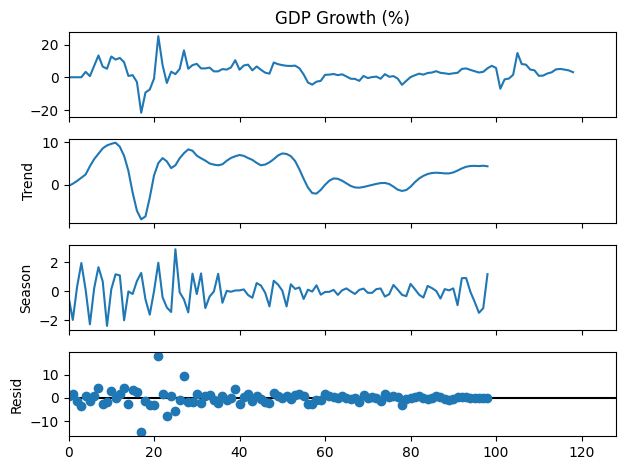

In [99]:
stl = STL(df['GDP Growth (%)'], period=4)
res = stl.fit()
fig = res.plot()

**Анализ квартального роста ВВП Сербии (1999–2022) с использованием STL-декомпозиции**  

### 1. **Исторический контекст и ключевые события**  
   - **1999–2000**: Последствия бомбардировок НАТО, экономическая изоляция, гиперинфляция.  
   - **2000-е**: Переход к рыночной экономике, приватизация, стабилизация после кризиса.  
   - **2008–2009**: Глобальный финансовый кризис — замедление роста.  
   - **2010-е**: Переговоры о вступлении в ЕС, приток иностранных инвестиций.  
   - **2020–2022**: Пандемия COVID-19, сокращение ВВП в 2020 г., восстановление в 2021–2022 гг.  

---

### 2. **Интерпретация компонент STL**  
   - **Тренд (Trend)**:  
     - Нулевой тренд в отдельные периоды может отражать **долгосрочную стагнацию** (например, 2000-е годы из-за структурных реформ).  
     - Микроподъемы после 2010 г. — результат либерализации экономики и интеграции с ЕС.  
   - **Сезонность (Season)**:  
     - Слабая сезонность (близкая к нулю) объясняется тем, что данные **уже скорректированы на сезонность** (стандартная практика для квартального ВВП).  
     - В сырьевых секторах (например, сельское хозяйство) сезонные колебания могли нивелироваться другими отраслями.  
   - **Остатки (Resid)**:  
     - Пики до **-10%** соответствуют кризисам:  
       - 1999 г. — военные разрушения,  
       - 2008–2009 гг. — глобальный кризис,  
       - 2020 г. — пандемия.  

---

### 3. **Волатильность роста ВВП**  
   - Экстремальные колебания (-20% → +20%) характерны для переходных экономик.  
   - **Пики роста**:  
     - 2001–2003 гг. — восстановление после изоляции,  
     - 2006–2008 гг. — приток иностранных инвестиций,  
     - 2021–2022 гг. — постпандемическое восстановление.  
   - **Провалы**:  
     - 1999–2000 гг. — военные последствия,  
     - 2009 г. — экспортный коллапс,  
     - 2014 г. — наводнения, повредившие инфраструктуру.  

---

### 4. **Рекомендации**  
   - **Уточните методологию данных**:  
     - Проверьте, используются ли сезонные поправки (например, метод Census X-13).  
     - Убедитесь, что параметр `period=4` в STL учтен для кварталов.  
   - **Декомпозиция + событийный анализ**:  
     - Сопоставьте остатки с историческими событиями (например, введение санкций ЕС в 2000-х, пандемия).  
   - **Сравнение с другими странами региона**:  
     - Анализ динамики ВВП Сербии на фоне Хорватии, Боснии и Герцеговины выявит структурные различия.  
   - **Прогнозирование**:  
     - Учитывая высокую чувствительность к шокам, используйте модели с экзогенными переменными (цены на энергоресурсы, политические риски).  

---

### 5. **Выводы**  
Рост ВВП Сербии за 1999–2022 гг. отражает **типичную динамику переходной экономики**:  
- Краткосрочные шоки доминируют над структурными трендами.  
- Сезонность нивелируется корректировкой данных и диверсификацией экономики.  
- Для устойчивого роста необходимы: снижение зависимости от сырьевого сектора, улучшение инвестиционного климата, интеграция с ЕС.  

График STL подтверждает, что Сербия остается уязвимой к внешним кризисам, но демонстрирует способность к быстрому восстановлению.

1. Foreign direct investments are recorded in line with BPM6 methodology, according to which increase of assets (residents' investments abroad) and liabilities (non-residents' investments in Serbia) is shown with a positive sign (and vice-verse). Net FDI is calculated as assets minus liabilities, meaning that negative net FDI indicates larger inflow from non-residents' investments in Serbia than outflow from residents' investments abroad.

In [100]:
fdi = pd.read_excel('fdi.xlsx')

In [101]:
fdi.head()

,year,"FDI, net (ml euro)"
0,1997,654.0
1,1998,101.0
2,1999,105.0
3,2000,54.0
4,2001,184.0


In [102]:
indprod = pd.read_excel('indprod.xlsx')

In [103]:
indprod.head()

,year,Industrial Production (2023 = 100%)
0,1999,75.2
1,2000,74.9
2,2001,75.0
3,2002,76.4
4,2003,74.2


In [104]:
fig = px.line(fdi, x='year', y='FDI, net (ml euro)', title='FDI amount (net)')
fig.show()

In [105]:
fig = px.line(indprod, x='year', y='Industrial Production (2023 = 100%)', title='Industrial Production (2023 = 100%)')
fig.show()

In [106]:
df_yearly

,year,GDP Growth (%)
0,1995,0.000
1,1996,6.075
2,1997,8.800
3,1998,5.775
4,1999,-10.350
5,2000,7.050
6,2001,6.700
7,2002,6.550
8,2003,4.625
9,2004,6.525


In [107]:
fdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27 non-null     int64  
 1   FDI, net (ml euro)  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 564.0 bytes


In [108]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            30 non-null     object 
 1   GDP Growth (%)  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [109]:
df_yearly['year'] = df_yearly['year'].astype(int)

In [110]:
data = pd.merge(df_yearly, fdi, on='year', how='left')

In [111]:
data.head()

,year,GDP Growth (%),"FDI, net (ml euro)"
0,1995,0.000,NaN
1,1996,6.075,NaN
2,1997,8.800,654.0
3,1998,5.775,101.0
4,1999,-10.350,105.0


In [112]:
data = pd.merge(data, indprod, on='year', how='left')

In [113]:
data

,year,GDP Growth (%),"FDI, net (ml euro)",Industrial Production (2023 = 100%)
0,1995,0.000,NaN,NaN
1,1996,6.075,NaN,NaN
2,1997,8.800,654.0,NaN
3,1998,5.775,101.0,NaN
4,1999,-10.350,105.0,75.2
5,2000,7.050,54.0,74.9
6,2001,6.700,184.0,75.0
7,2002,6.550,500.0,76.4
8,2003,4.625,1194.0,74.2
9,2004,6.525,774.0,79.1


<Axes: >

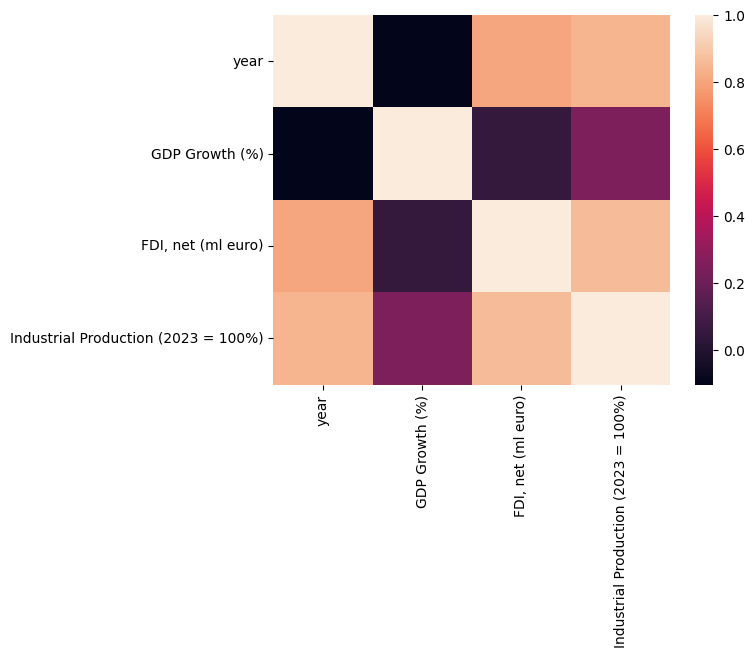

In [114]:
corr = data.corr()
sns.heatmap(corr)

In [115]:
data1 = data[data['year'] >= 1999]

<Axes: >

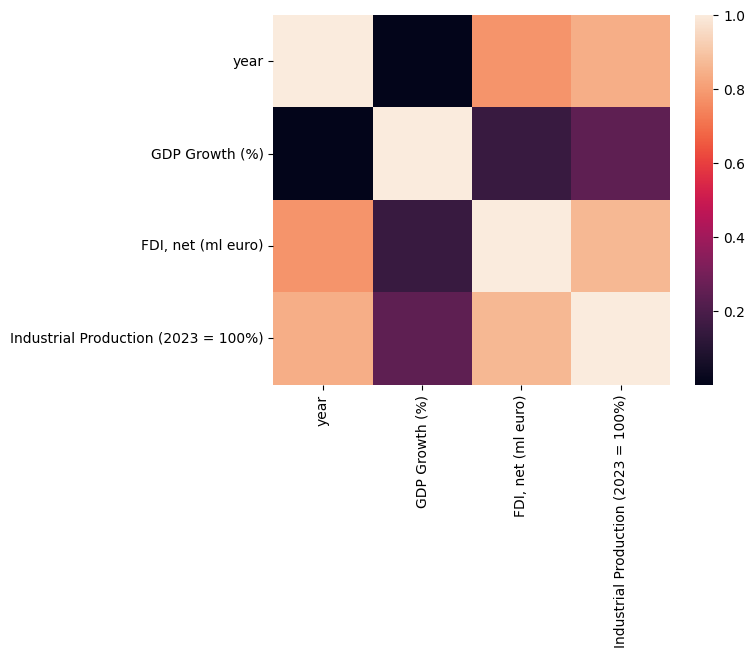

In [116]:
corr = data1.corr()
sns.heatmap(corr)

In [117]:
data

,year,GDP Growth (%),"FDI, net (ml euro)",Industrial Production (2023 = 100%)
0,1995,0.000,NaN,NaN
1,1996,6.075,NaN,NaN
2,1997,8.800,654.0,NaN
3,1998,5.775,101.0,NaN
4,1999,-10.350,105.0,75.2
5,2000,7.050,54.0,74.9
6,2001,6.700,184.0,75.0
7,2002,6.550,500.0,76.4
8,2003,4.625,1194.0,74.2
9,2004,6.525,774.0,79.1


In [118]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# Уберите строки с NaN
data_clean = data.dropna()
data_clean = data_clean[['GDP Growth (%)', 'FDI, net (ml euro)', 'Industrial Production (2023 = 100%)']]
data_clean['FDI_diff'] = data_clean['FDI, net (ml euro)'].diff().dropna()
data_clean['IP_diff'] = data_clean['Industrial Production (2023 = 100%)'].diff().dropna()
data_clean = data_clean[['GDP Growth (%)', 'FDI_diff', 'IP_diff']].dropna()
coint_rank = select_coint_rank(data_clean[['GDP Growth (%)', 'FDI_diff', 'IP_diff']], det_order=0, k_ar_diff=1)
print(coint_rank.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          62.27          29.80
  1   3          22.17          15.49
  2   3          3.835          3.841
-------------------------------------


In [119]:
from statsmodels.tsa.api import VAR

model = VAR(data_clean)
results = model.fit(maxlags=2, ic='aic')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Jul, 2025
Time:                     14:29:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    18.4936
Nobs:                     22.0000    HQIC:                   17.6975
Log likelihood:          -264.624    FPE:                4.06623e+07
AIC:                      17.4522    Det(Omega_mle):     1.77528e+07
--------------------------------------------------------------------
Results for equation GDP Growth (%)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     1.381167         0.978755            1.411           0.158
L1.GDP Growth (%)        -0.013744         0.290091           -0.047           0.962
L1.FDI_diff               0.001061 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



In [120]:
from statsmodels.tsa.stattools import grangercausalitytests

# Выберите две переменные и уберите пропуски
test_data = data_clean[['GDP Growth (%)', 'FDI_diff']]
grangercausalitytests(test_data, maxlag=1)  # maxlag=1 из-за малого объема данных


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0851  , p=0.7735  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=0.0978  , p=0.7544  , df=1
likelihood ratio test: chi2=0.0976  , p=0.7547  , df=1
parameter F test:         F=0.0851  , p=0.7735  , df_denom=20, df_num=1


{np.int64(1): ({'ssr_ftest': (np.float64(0.08507195320386914),
    np.float64(0.7735419690416331),
    np.float64(20.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.09783274618444951),
    np.float64(0.7544460892206281),
    np.int64(1)),
   'lrtest': (np.float64(0.09762526377070913),
    np.float64(0.7546982387143857),
    np.int64(1)),
   'params_ftest': (np.float64(0.08507195320375383),
    np.float64(0.7735419690417806),
    np.float64(20.0),
    1.0)},
   array([[0., 1., 0.]])])}

In [121]:
test_data = data_clean[['GDP Growth (%)', 'IP_diff']]
grangercausalitytests(test_data, maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2511  , p=0.6218  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=0.2887  , p=0.5910  , df=1
likelihood ratio test: chi2=0.2869  , p=0.5922  , df=1
parameter F test:         F=0.2511  , p=0.6218  , df_denom=20, df_num=1


{np.int64(1): ({'ssr_ftest': (np.float64(0.2510827466296853),
    np.float64(0.6217840149859705),
    np.float64(20.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.2887451586241381),
    np.float64(0.5910257864475291),
    np.int64(1)),
   'lrtest': (np.float64(0.2869477133857288),
    np.float64(0.5921831795541717),
    np.int64(1)),
   'params_ftest': (np.float64(0.25108274662968155),
    np.float64(0.6217840149859735),
    np.float64(20.0),
    1.0)},
   array([[0., 1., 0.]])])}

In [122]:
df

,time,GDP Growth (%),tags,year,z_score,anomaly
0,1995/I квартал,0.0,(л),1995,NaN,1
1,1995/II квартал,0.0,(л),1995,NaN,1
2,1995/III квартал,0.0,(л),1995,NaN,1
3,1995/IV квартал,0.0,(л),1995,NaN,1
4,1996/I квартал,3.3,(р),1996,NaN,1
...,...,...,...,...,...,...
124,с,NaN,Разница в определении,NaN,NaN,1
125,ф,NaN,Вмененная стоимость,NaN,NaN,1
126,-,NaN,Не имеет значения,NaN,NaN,1
127,п,NaN,Низкая надежность,NaN,NaN,1


In [123]:
df_raw = df.iloc[:119]

In [124]:
df_raw = df_raw[['time', 'GDP Growth (%)']]

In [125]:
df_raw

,time,GDP Growth (%)
0,1995/I квартал,0.0
1,1995/II квартал,0.0
2,1995/III квартал,0.0
3,1995/IV квартал,0.0
4,1996/I квартал,3.3
...,...,...
114,2023/3 квартал,4.8
115,2023/IV квартал,5.1
116,2024/I квартал,4.7
117,2024/II квартал,4.2


In [126]:
#quarter_mapping = {"I квартал": "Q1", "II квартал": "Q2", "III квартал": "Q3", "IV квартал": "Q4", "3 квартал": "Q3"}

In [127]:
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/I квартал", r"\1-Q1", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/II квартал", r"\1-Q2", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/III квартал", r"\1-Q3", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/IV квартал", r"\1-Q4", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/3 квартал", r"\1-Q3", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/1-й квартал", r"\1-Q1", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/2-й квартал", r"\1-Q2", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/3-й квартал", r"\1-Q3", regex=True)
df_raw["time"] = df_raw["time"].str.replace(r"(\d{4})/4-й квартал", r"\1-Q4", regex=True)

In [128]:
df_raw

,time,GDP Growth (%)
0,1995-Q1,0.0
1,1995-Q2,0.0
2,1995-Q3,0.0
3,1995-Q4,0.0
4,1996-Q1,3.3
...,...,...
114,2023-Q3,4.8
115,2023-Q4,5.1
116,2024-Q1,4.7
117,2024-Q2,4.2


In [129]:
df_raw["time"] = pd.PeriodIndex(df_raw["time"], freq="Q")

In [130]:
gdp2005 = pd.read_excel('gdp.xlsx')

In [131]:
gdp2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  20 non-null     int64
 1   GDP (in EUR million)  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [132]:
fig = px.line(gdp2005, x='year', y='GDP (in EUR million)', title="Dynamics of GDP")
fig.update_layout(
    xaxis_title="Time period",
    yaxis_title="GDP",
    xaxis=dict(tickangle=45),
    template="plotly_white"
)

fig.show()

In [133]:
data = pd.merge(data, gdp2005, on='year', how='left')

In [134]:
corr = data.corr()

fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    template="plotly_dark"
)

fig.show()


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 30 non-null     int64  
 1   GDP Growth (%)                       30 non-null     float64
 2   FDI, net (ml euro)                   27 non-null     float64
 3   Industrial Production (2023 = 100%)  26 non-null     float64
 4   GDP (in EUR million)                 20 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [136]:
# Создаем фигуру
fig = go.Figure()

# Выбираем нужные столбцы
columns_to_plot = ['FDI, net (ml euro)', 'Industrial Production (2023 = 100%)', 'GDP (in EUR million)', 'GDP Growth (%)']

# Добавляем линии для каждого показателя
for column in columns_to_plot:
    if column == 'Industrial Production (2023 = 100%)':
        yaxis = "y2"
    elif column == 'FDI, net (ml euro)':
        yaxis = "y3"
    elif column == 'GDP Growth (%)':
        yaxis = "y4"
    else:
        yaxis = "y1"

    fig.add_trace(go.Scatter(
        x=data["year"],
        y=data[column],
        mode='lines+markers',
        name=column,
        yaxis=yaxis
    ))

# Настройки осей и заголовка
fig.update_layout(
    title="Economic Indicators Over Time",
    xaxis_title="Year",
    yaxis=dict(
        title="GDP (mln EUR)",
        side="left",
        showgrid=False
    ),
    yaxis2=dict(
        title="Industrial Production (2023 = 100%)",
        overlaying="y",
        side="right",
        showgrid=False
    ),
    yaxis3=dict(
        title="FDI, net (mln EUR)",
        overlaying="y",
        side="right",
        position=0.85,
        showgrid=False
    ),
    yaxis4=dict(
        title="GDP Growth (%)",
        overlaying="y",
        side="right",
        position=0.9,
        showgrid=False
    ),
    template="plotly_dark"
)

fig.show()



In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 30 non-null     int64  
 1   GDP Growth (%)                       30 non-null     float64
 2   FDI, net (ml euro)                   27 non-null     float64
 3   Industrial Production (2023 = 100%)  26 non-null     float64
 4   GDP (in EUR million)                 20 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [138]:
data['FDI Growth(%)'] = data['FDI, net (ml euro)'].pct_change()*100

/tmp/ipython-input-138-1732560555.py:1: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [139]:
data.head()

,year,GDP Growth (%),"FDI, net (ml euro)",Industrial Production (2023 = 100%),GDP (in EUR million),FDI Growth(%)
0,1995,0.000,NaN,NaN,NaN,NaN
1,1996,6.075,NaN,NaN,NaN,NaN
2,1997,8.800,654.0,NaN,NaN,NaN
3,1998,5.775,101.0,NaN,NaN,-84.556575
4,1999,-10.350,105.0,75.2,NaN,3.960396


In [140]:
corr = data.corr()

fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    template="plotly_dark"
)

fig.show()


In [141]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   time            119 non-null    period[Q-DEC]
 1   GDP Growth (%)  119 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 2.0 KB


In [142]:
df_raw

,time,GDP Growth (%)
0,1995Q1,0.0
1,1995Q2,0.0
2,1995Q3,0.0
3,1995Q4,0.0
4,1996Q1,3.3
...,...,...
114,2023Q3,4.8
115,2023Q4,5.1
116,2024Q1,4.7
117,2024Q2,4.2


In [143]:
df_raw.set_index('time', inplace=True)

In [144]:
df_raw.index = df_raw.index.to_timestamp()

In [145]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Ряд стационарен")
    else:
        print("Ряд нестационарен, требуется дифференцирование")

adf_test(df_raw['GDP Growth (%)'])

ADF Statistic: -4.079465931136951
p-value: 0.0010470489241555805
Ряд стационарен


In [146]:
#auto_arima(df_raw['GDP Growth (%)'], seasonal=False, trace=True)

In [147]:
model = ARIMA(df_raw['GDP Growth (%)'], order=(0, 0, 1))
arima_fit = model.fit()

In [148]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         GDP Growth (%)   No. Observations:                  119
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -344.503
Date:                Mon, 14 Jul 2025   AIC                            695.005
Time:                        14:29:44   BIC                            703.343
Sample:                    01-01-1995   HQIC                           698.391
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1614      0.727      4.351      0.000       1.737       4.585
ma.L1          0.6638      0.059     11.230      0.000       0.548       0.780
sigma2        19.0524      1.554     12.262      0.0

In [149]:
forecast_steps = 4  # Прогноз на 1 год (4 квартала)
forecast_index = pd.date_range(start=df_raw.index[-1], periods=forecast_steps+1, freq='QE')[1:]

forecast = arima_fit.forecast(steps=forecast_steps)

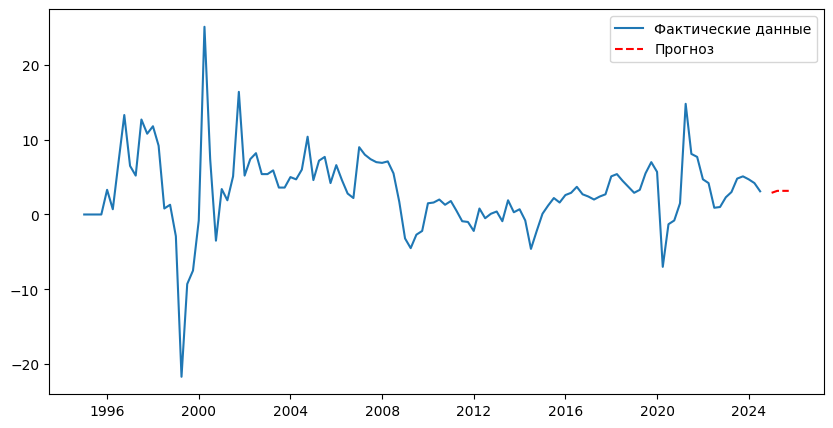

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(df_raw.index, df_raw['GDP Growth (%)'], label="Фактические данные")
plt.plot(forecast_index, forecast, label="Прогноз", linestyle="dashed", color='red')
plt.legend()
plt.show()

In [151]:
fig = go.Figure()

# Фактические данные
fig.add_trace(go.Scatter(
    x=df_raw.index,
    y=df_raw['GDP Growth (%)'],
    mode='lines',
    name='Фактические данные'
))

# Прогноз
fig.add_trace(go.Scatter(
    x=forecast_index,
    y=forecast,
    mode='lines',
    name='Прогноз',
    line=dict(dash='dash', color='red')
))

# Настройки графика
fig.update_layout(
    title='Прогноз GDP Growth (%)',
    xaxis_title='Дата',
    yaxis_title='GDP Growth (%)',
    template='plotly_white'
)

fig.show()
